# 0. 선형 회귀분석의 기초
- 회귀분석(regression analysis)은 독립 변수  x 와 이에 대응하는 종속 변수  y 간의 관계를 정량화하는 작업이다.

- 회귀분석에는 결정론적 모형(Deterministic Model)과 확률적 모형(Probabilistic Model)이 있다. 여기에서는 결정론적 모형에 대해 설명한다. 결정론적 모형은 단순히 독립 변수  x 에 대해 대응하는 종속변수  y 와 가장 비슷한 값  ŷ  를 출력하는 함수  f(x) 를 찾는 과정이다.

ŷ =f(x)≈y
 
- 만약 독립 변수  x 와 이에 대응하는 종속 변수  y 간의 관계가 다음과 같은 선형 함수  f(x) 이면 선형 회귀분석(linear regression analysis)이라고 한다.

ŷ =w0+w1x1+w2x2+⋯+wDxD
 
- 위 식에서  w0,⋯,wD 를 함수  f(x) 의 계수(coefficient)이자 이 선형 회귀모형의 모수(parameter)라고 한다.

- OLS(Ordinary Least Squares)는 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.

# 1. 회귀분석 모듈 소개

# 1-1. Scikit-Learn 패키지를 사용한 선형회귀분석
### Scikit-Learn 패키지의 서브 패키지 linear_model의 LinearRegression 클래스를 사용한다.
### 사용법은 다음과 같다.

#### 1. LinearRegression 클래스 객체 생성

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

- 상수항이 없으면 fit_intercept=False로 설정한다.

#### 2. fit 메서드로 모형 추정. (오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.)

In [ ]:
model = model.fit(X, y)

- 회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 fit 메서드는 객체 자신을 반환한다.
    1. coef_ : 추정된 가중치 벡터
    2. intercept_ : 추정된 상수항

#### 3. predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측

In [ ]:
y_new = model.predict(x_new)

# 1-2. Statsmodels 패키지를 사용한 선형회귀분석
### statsmodels 패키지에서는 OLS 클래스를 사용하여 선형회귀분석을 실시한다. 
### OLS 클래스 사용법은 다음과 같다.

#### 1. OLS 클래스 객체 생성. 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.



In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
model = OLS(y, X)

- 상수항이 없으면 fit_intercept=False로 설정한다.

#### 2. fit 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 RegressionResults 클래스 객체로 출력된다.

In [ ]:
result = model.fit()

#### 3. RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공한다.

In [ ]:
print(result.summary())

y_new = result.predict(x_new)

# 2. 데이터 준비
## 보스턴 주택 가격 데이터
### 1970년대 미국 보스턴의 주택 가격 데이터이다.
- conda install scikit-learn을 설치해야 함.
- load_boston() 명령으로 로드하며 다음과 같이 구성되어 있다.

    - 타겟 데이터(boston.target)
        1. 1978 보스턴 주택 가격(506개 타운의 주택 가격 중앙값 (단위 1,000 달러))
    - 특징 데이터(boston.data)
        1. CRIM: 범죄율
        2. INDUS: 비소매상업지역 면적 비율
        3. NOX: 일산화질소 농도
        4. RM: 주택당 방 수
        5. LSTAT: 인구 중 하위 계층 비율
        6. B: 인구 중 흑인 비율
        7. PTRATIO: 학생/교사 비율
        8. ZN: 25,000 평방피트를 초과 거주지역 비율
        9. CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
        10. AGE: 1940년 이전에 건축된 주택의 비율
        11. RAD: 방사형 고속도로까지의 거리
        12. DIS: 직업센터의 거리
        13. TAX: 재산세율

In [1]:
from sklearn.datasets import load_boston
# 데이터 준비
boston = load_boston()
# 데이터(boston) 소개
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Scikit-learn 모듈 사용한 선형회귀분석

In [2]:
from sklearn.linear_model import LinearRegression

# scikit-learn 모델 사용 선형모형 피팅 - (독립변수, 종속변수) 순서임.
model_boston = LinearRegression().fit(boston.data, boston.target) 

In [3]:
model_boston.coef_ # 추정된 가중치 벡터

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [4]:
model_boston.intercept_ # 추정된 상수항

36.491103280361372

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

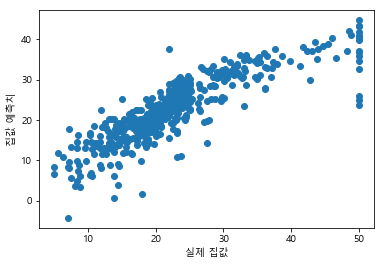

In [6]:
# 예측 모델
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

## StatsModels 모듈을 사용한 선형회귀분석

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

E:\Programs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
import pandas as pd
# 독립변수
X = pd.DataFrame(boston.data, columns = boston.feature_names)
# 종속변수
Y = pd.DataFrame(boston.target, columns = ["MEDV"]) # 1000 달러짜리 소유 주택의 중앙값(median)

# 데이터 횡으로 합치기(concat)
df = pd.concat([X, Y], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [11]:
# 종속변수
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# 독립변수
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
# 데이터 준비
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names) # 독립변수
dfX = sm.add_constant(dfX0) # 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야 한다.
dfy = pd.DataFrame(boston.target, columns=["MEDV"]) # 종속변수

In [14]:
# model_boston2라는 이름으로 OLS 모델 구조화
model_boston2 = sm.OLS(dfy, dfX) # (종속변수, 독립변수)

# OLS 회귀모형 피팅
result_boston2 = model_boston2.fit()

# 회귀분석 결과 요약
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 May 2018   Prob (F-statistic):          6.95e-135
Time:                        08:56:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

- 모델의 설명력(R-squared)
    - 즉, 결정계수가 0.22라면 Y의 변동 중 22%가 회귀모형에 의해 설명되고 나머지 78%는 모형에 포함되지 않는 다른 요인들로 설명됨
    - 단순 선형회귀에서는 상관계수r의 제곱과 정확히 일치함 r^2 = R^2
    - r=0.87 -> r^2=0.76 -> R^2 = 0.76 X와 Y의 상관관계가 높을 수록 모형에 의해 데이터가 많이 설명될 수 있다

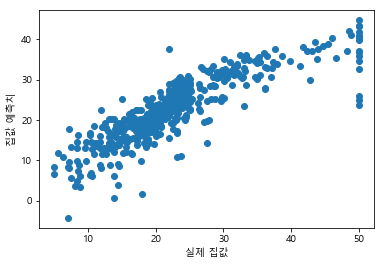

In [16]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

- 예측을 할 때는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. 예를 들어 다음과 같은 입력데이터를 생각해보자.

In [17]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]

- 이 데이터는 원래 입력데이터의 평균값을 변형하여 만든 가상의 데이터이다.

In [18]:
dfX0.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

- 다음과 같이 원래 데이터와 동일한 형태의 데이터프레임을 만들어야 한다. 
- 여기에서 데이터 행이 하나인 경우에는 add_constant에 has_constant="add" 인수를 추가해야 한다.

In [19]:
import numpy as np
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, 
                                       columns=boston.feature_names), 
                          has_constant="add") # has_constant = "add"
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,4.0,11.0,11.0,0.1,0.6,6.0,70.0,4.0,10.0,410.0,20.0,360.0,13.0


In [22]:
result_boston2.predict(dfx_new)

0    18.854172
dtype: float64

- RegressionResults 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 
- 자주 사용되는 속성으로는 다음과 같은 것들이 있다.
    1. resid: 잔차 벡터
    2. params: 모수 벡터

In [45]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [52]:
result_boston2.resid

0      -6.008213
1      -3.429861
2       4.129768
3       4.791859
4       8.257118
5       3.440600
6      -0.104340
7       7.565244
8       4.983035
9      -0.019815
10     -3.995827
11     -2.689709
12      0.794651
13      0.844641
14     -1.083796
15      0.599998
16      2.571100
17      0.590325
18      4.029326
19     -0.207816
20      1.079595
21      1.928954
22     -0.629349
23      0.696317
24     -0.077081
25      0.520836
26      1.137412
27      0.101364
28     -1.145185
29      0.126901
         ...    
476    -3.828357
477     0.457095
478    -4.603875
479    -0.468206
480    -0.470522
481    -3.400345
482    -3.570648
483     0.716012
484     1.150947
485    -1.018922
486    -0.554231
487    -0.724671
488     3.337686
489    -1.222606
490     4.441748
491    -0.162760
492     4.162191
493     1.172699
494     3.889646
495     6.219520
496     5.689828
497    -0.808255
498    -0.097207
499    -0.955242
500    -3.667642
501    -1.132617
502    -1.778698
503    -3.7293